In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

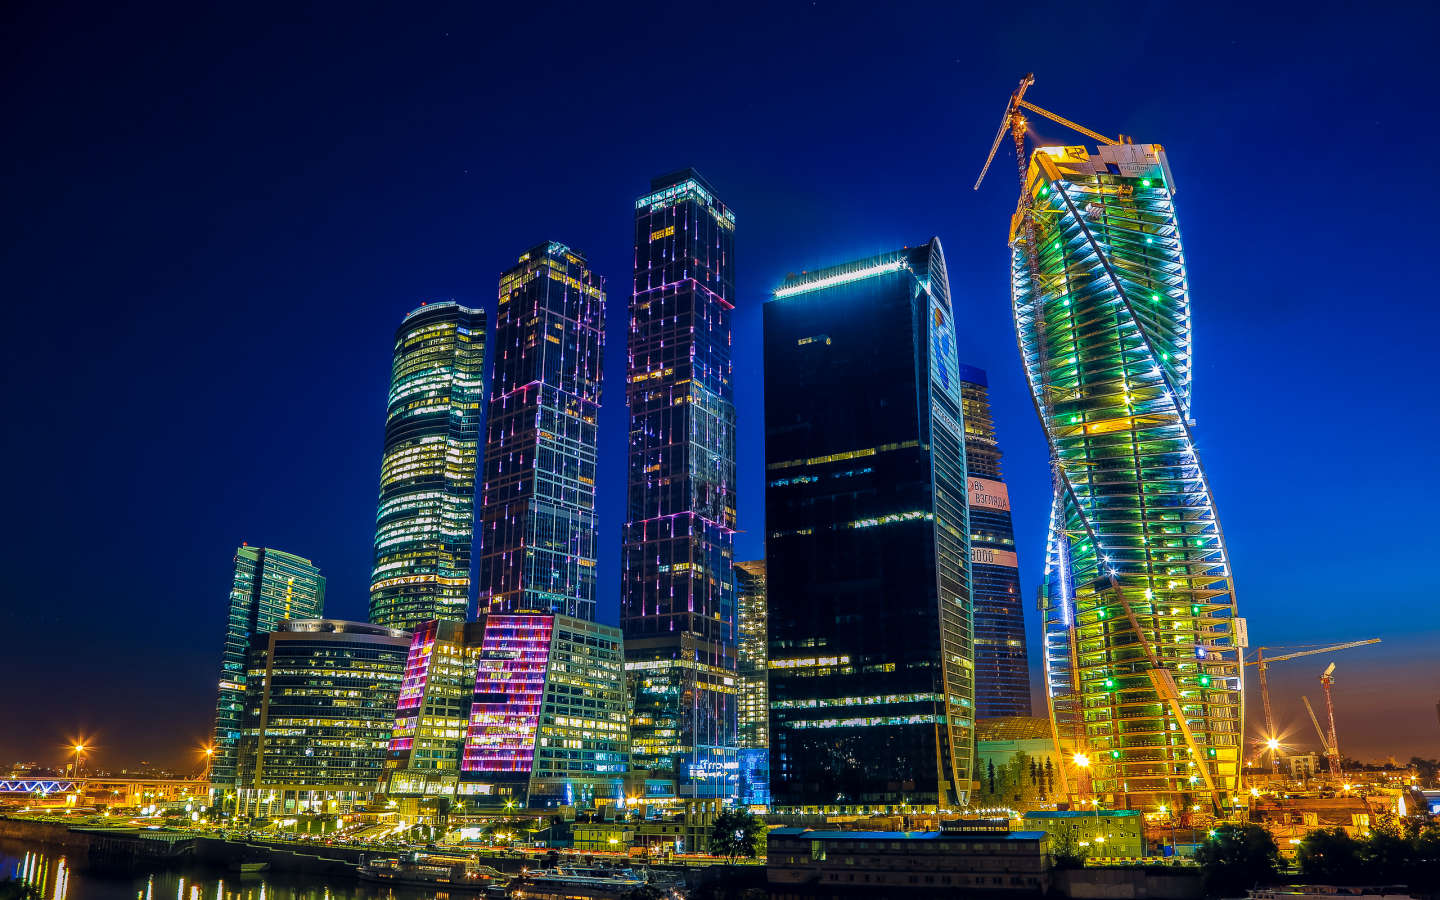

In [2]:
img = Image.open('Moscow2.jpg')
img

In [3]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [4]:
x.shape

(900, 1440, 3)

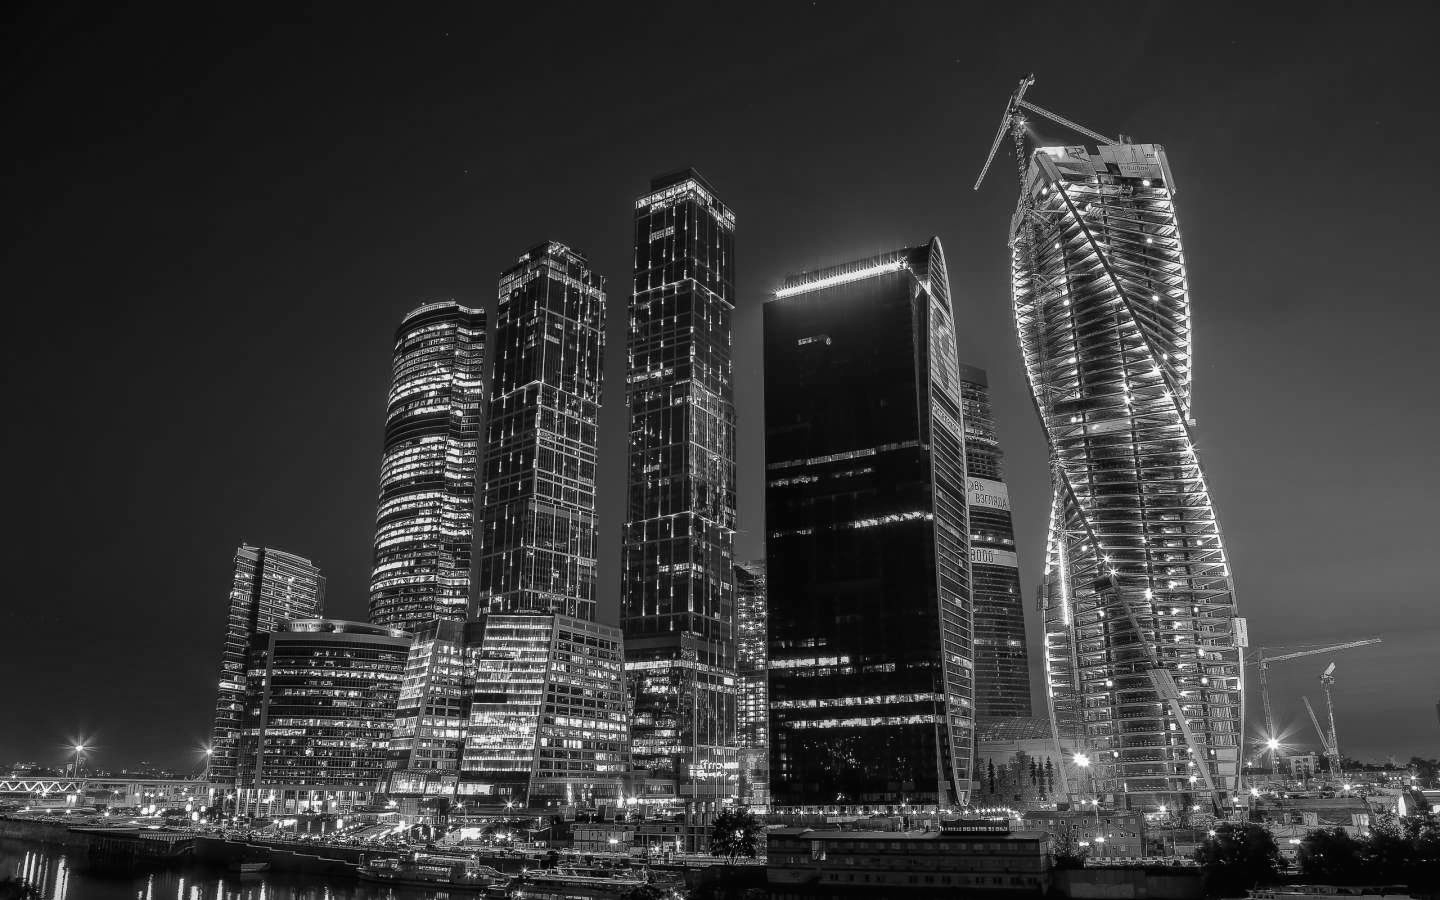

In [5]:
y = Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))
y

In [6]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [7]:
U.shape

(900, 900)

In [8]:
B = U.dot(np.diag(S).dot(V))
B.shape

(900, 1440)

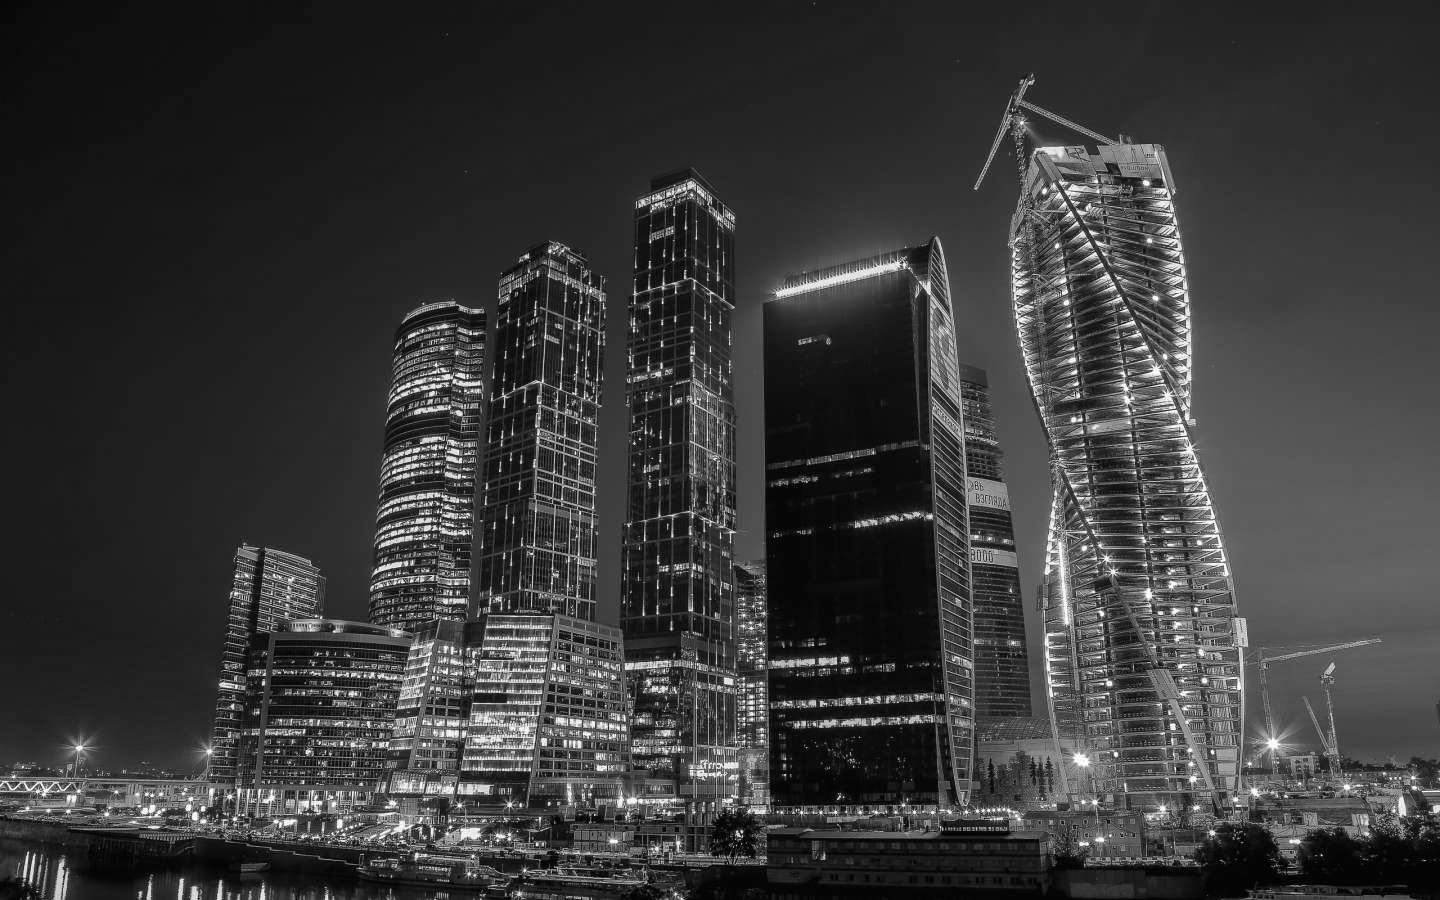

In [9]:
C = Image.fromarray(np.asarray(B, dtype=np.uint8))
C

In [10]:
B.shape

(900, 1440)

In [11]:
S = np.diag(S)

In [12]:
r = [10, 20, 30, 40, 60, 80]
for i in r:
    new_y = U[:,:i] @ S[:i,:i] @ V[:i,:]
    new_y[new_y < 0] = 0
    new_y[new_y > 255] = 255
    Image.fromarray(np.asarray(new_y, dtype=np.uint8)).save(f'result_{i}.png')

(-0.5, 1439.5, 899.5, -0.5)

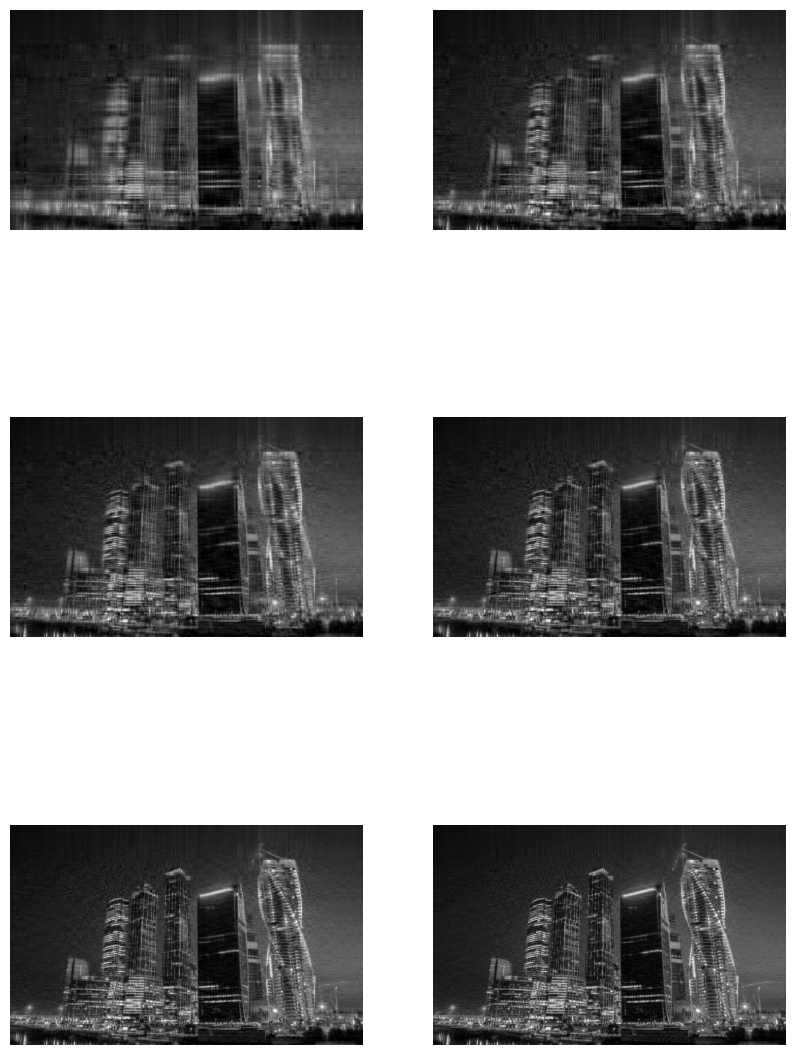

In [14]:
fig = plt.figure(figsize=(10, 15))

rows = 3
columns = 2

Image1 = Image.open('result_10.png')
Image2 = Image.open('result_20.png')
Image3 = Image.open('result_30.png')
Image4 = Image.open('result_40.png')
Image5 = Image.open('result_60.png')
Image6 = Image.open('result_80.png')

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 2)
  
plt.imshow(Image2, cmap='gray')
plt.axis('off')
  
fig.add_subplot(rows, columns, 3)
  
plt.imshow(Image3, cmap='gray')
plt.axis('off')
  
fig.add_subplot(rows, columns, 4)
  
plt.imshow(Image4, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 5)
  
plt.imshow(Image5, cmap='gray')
plt.axis('off')

fig.add_subplot(rows, columns, 6)
  
plt.imshow(Image6, cmap='gray')
plt.axis('off')

### Вывод  
Научились сжимать изображения с помощью сингулярного разложения. Фото в папке homework06
